# ***Realized by AKZOUN Hafsa***

In [1]:
import os

# List directories in /kaggle/input to find your dataset folder
print(os.listdir("/kaggle/input"))

['archive2']


# **Question 1**

**Step 1: Load the Dataset**

In [2]:
# Step 1: Load and Inspect the Data
import pandas as pd
# Adjust the file paths based on the folder name you found
data = pd.read_csv("/kaggle/input/archive2/predictive_maintenance.csv")

In [4]:
# Check the first few rows to verify data loading
print(data.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


In [5]:
# Display basic information and first few rows
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None


In [6]:
# Display summary statistics for the data
print("\n Dataset Summary:")
print(data.describe())


 Dataset Summary:
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000

In [12]:
print(data.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


**Step 2: Explore and Clean the Data**

In [13]:
data = data.drop(columns=['UDI', 'Product ID'])

**Check for Missing Values:**

In [14]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [15]:
# Check unique values in categorical columns
print("Unique values in 'Type':", data['Type'].unique())
print("Unique values in 'Failure Type':", data['Failure Type'].unique())

Unique values in 'Type': ['M' 'L' 'H']
Unique values in 'Failure Type': ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


**Remove Duplicates**

In [19]:
# Remove duplicates
data = data.drop_duplicates()

**Standardize/Normalize Numerical Data**

In [22]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Initialize the standard scaler
scaler = StandardScaler()

# Apply standardization to numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


**Split the Data into Features and Labels**

In [24]:
# Separate features (X) and target (y)
X = data.drop(columns=['Target'])
y = data['Target']

**Final Overview of Cleaned Data**

In [25]:
# Check the cleaned data
print(X.info())
print(X.head())
print("Target values:", y.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Air temperature [K]              10000 non-null  float64
 1   Process temperature [K]          10000 non-null  float64
 2   Rotational speed [rpm]           10000 non-null  float64
 3   Torque [Nm]                      10000 non-null  float64
 4   Tool wear [min]                  10000 non-null  float64
 5   Type_L                           10000 non-null  bool   
 6   Type_M                           10000 non-null  bool   
 7   Failure Type_No Failure          10000 non-null  bool   
 8   Failure Type_Overstrain Failure  10000 non-null  bool   
 9   Failure Type_Power Failure       10000 non-null  bool   
 10  Failure Type_Random Failures     10000 non-null  bool   
 11  Failure Type_Tool Wear Failure   10000 non-null  bool   
dtypes: bool(7), float64

# **Question 2**

**Step 1: Understand the Distribution of Numerical Features**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

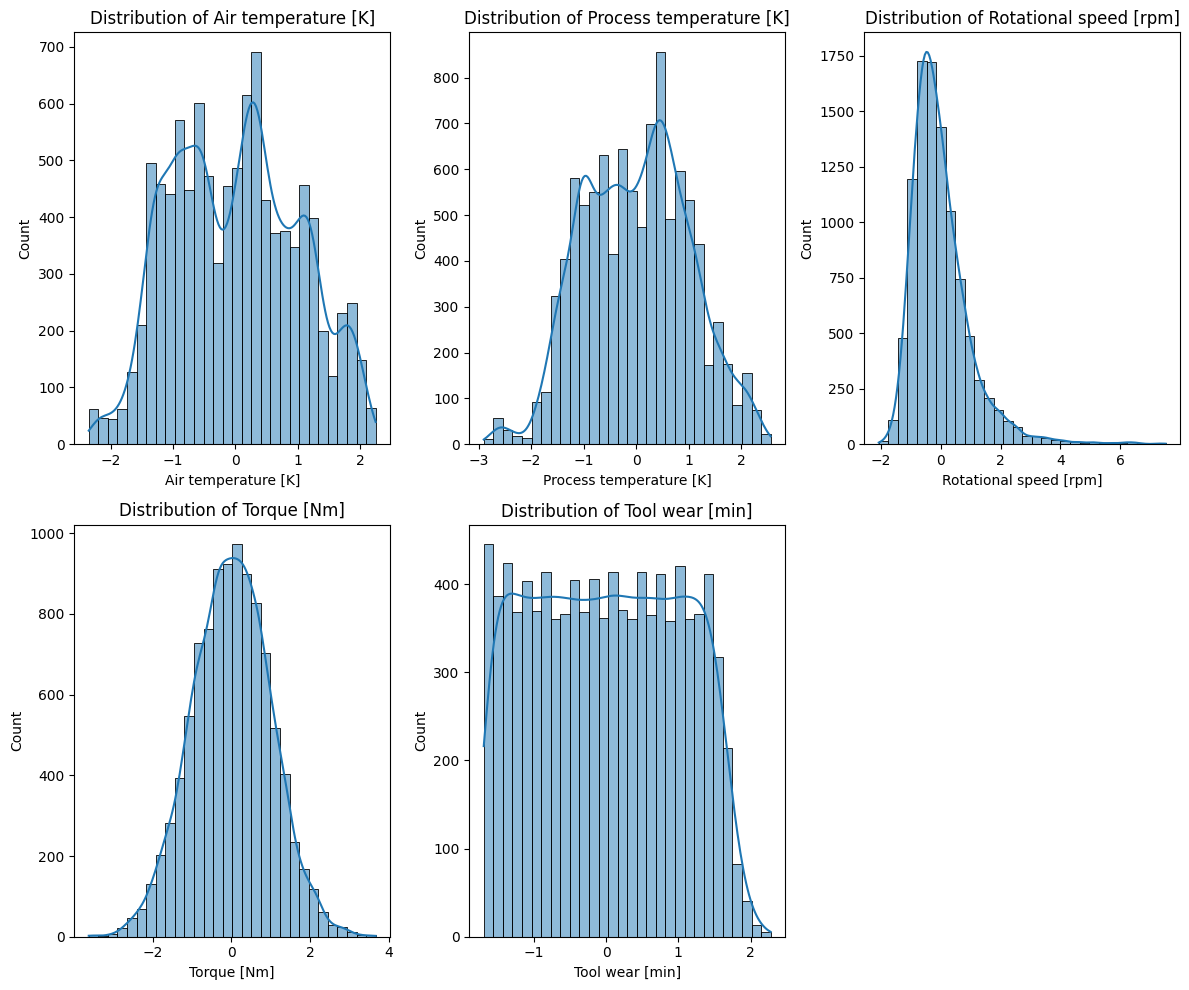

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms of numerical features
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Loop through numerical columns to plot histograms
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Step 2: Visualize Relationships Between Features**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

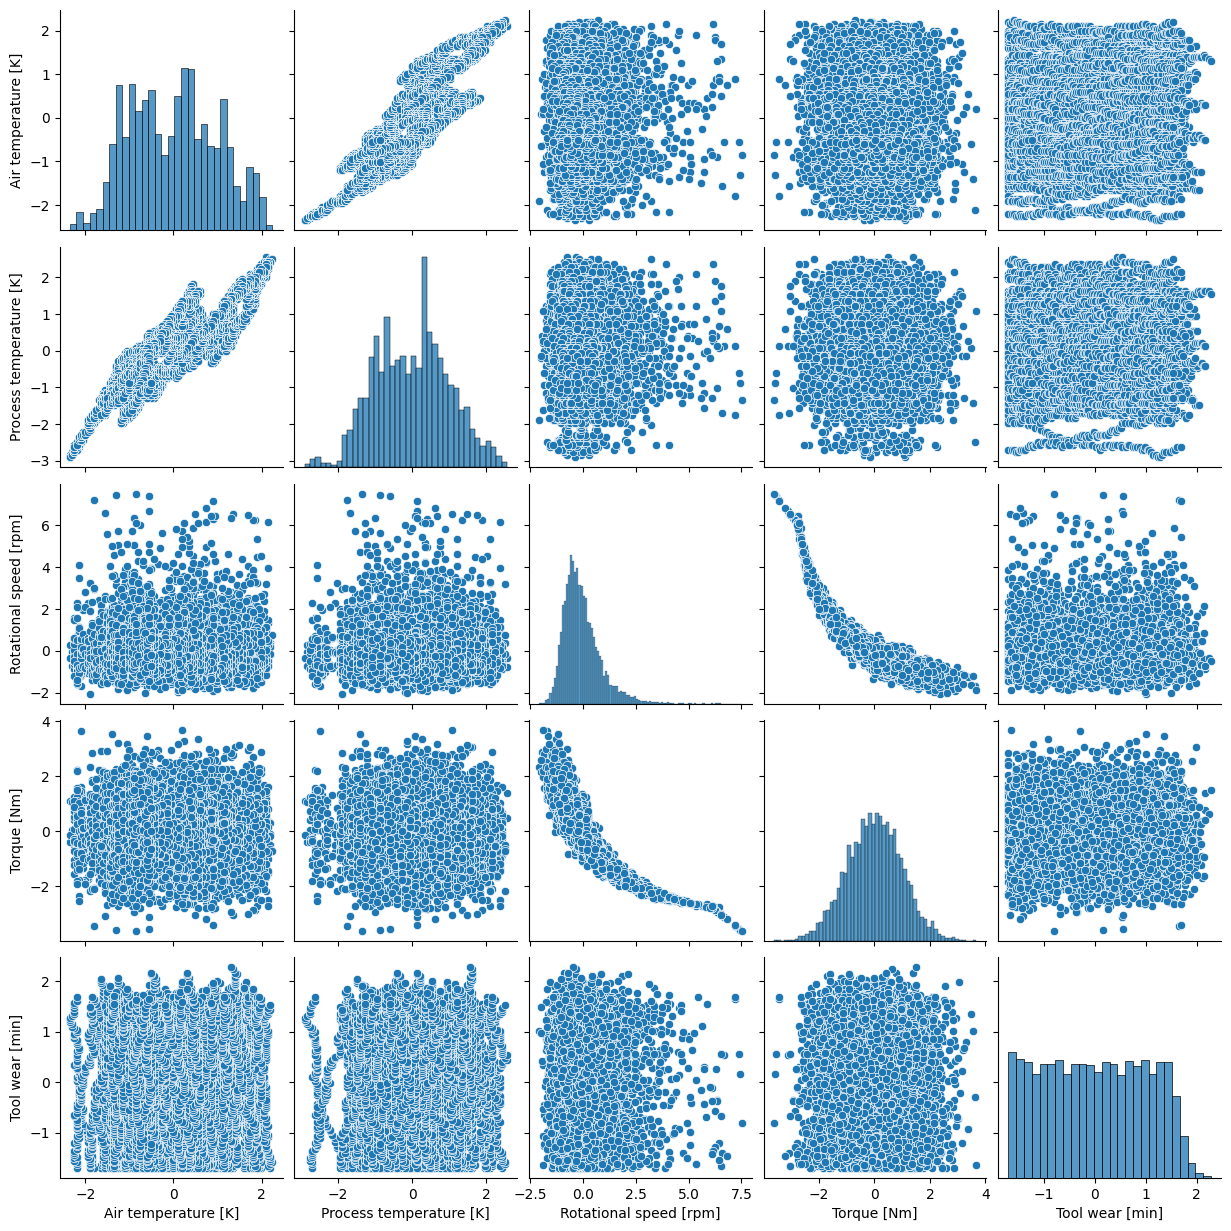

In [28]:
# Visualizing pairwise relationships between numerical columns
sns.pairplot(X[numerical_cols])
plt.show()

**Step 3: Check Correlation Between Features**

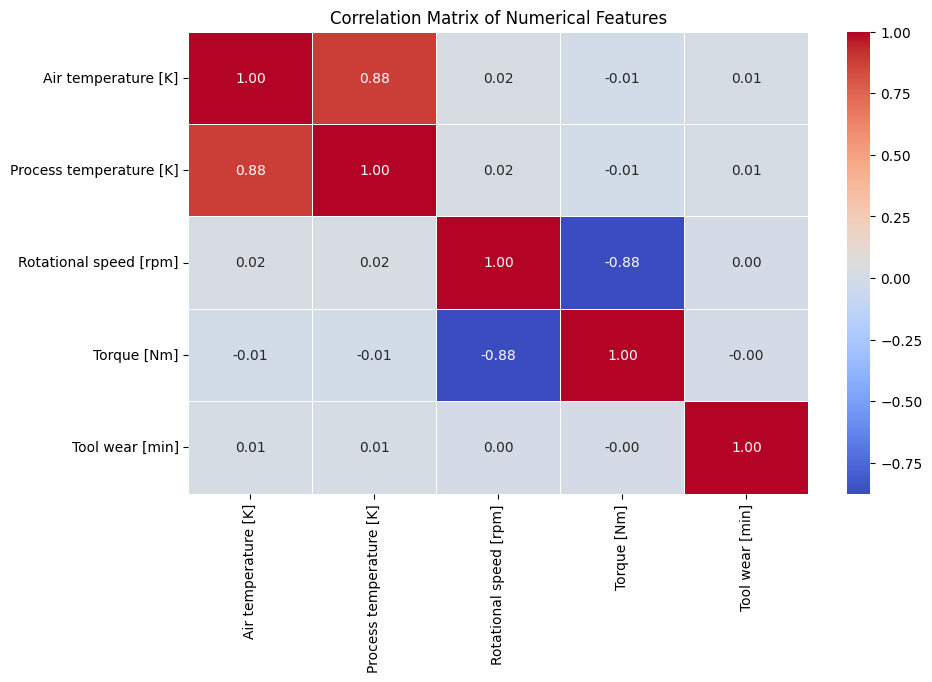

In [29]:
# Compute correlation matrix
correlation_matrix = X[numerical_cols].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Step 4: Examine the Target Variable Distribution**

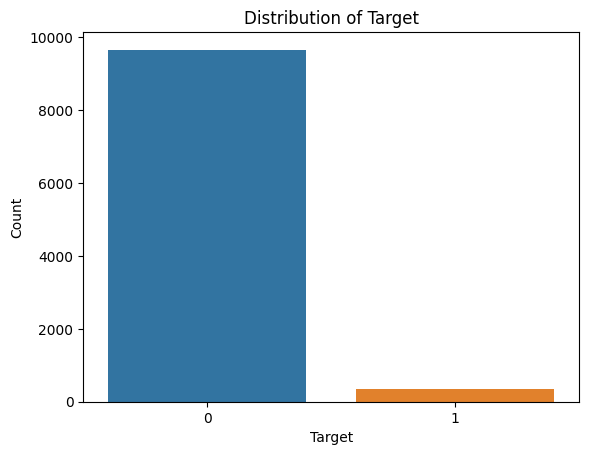

In [30]:
# Plot the distribution of the target variable
sns.countplot(x=y)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**Step 5: Visualize Relationships Between Features and the Target Variable**

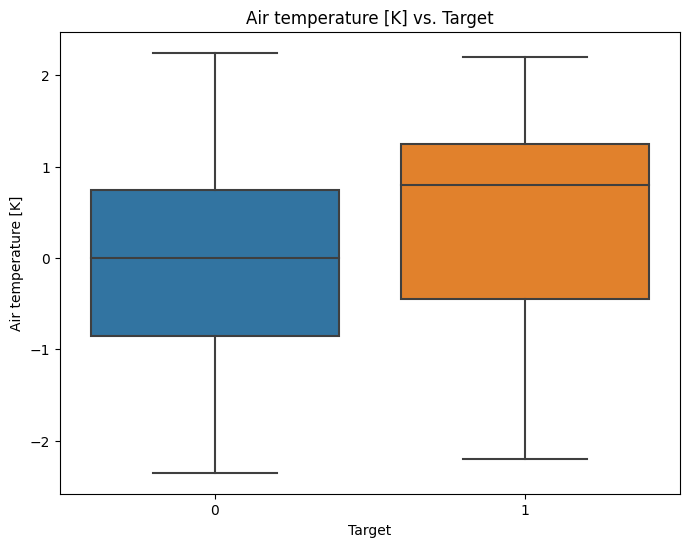

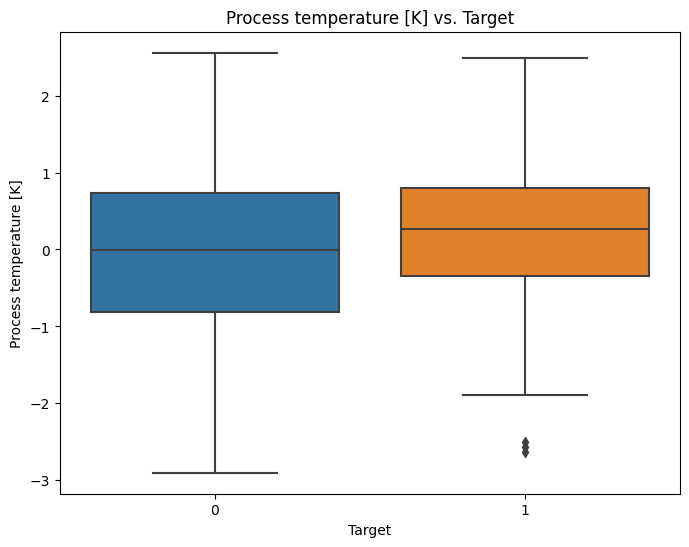

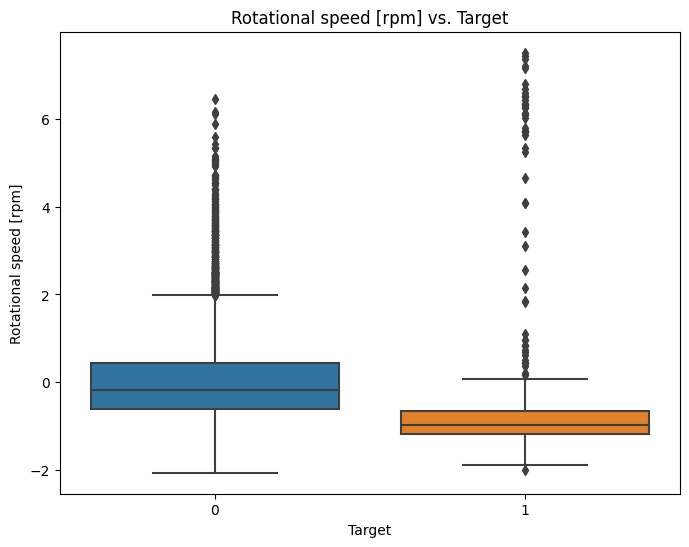

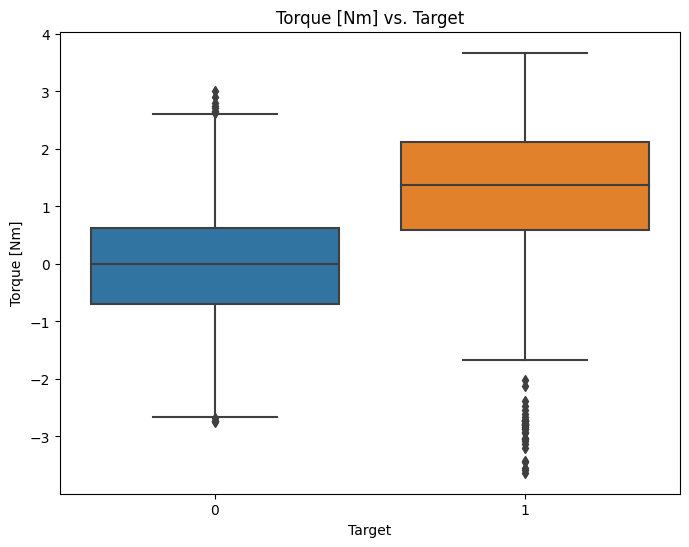

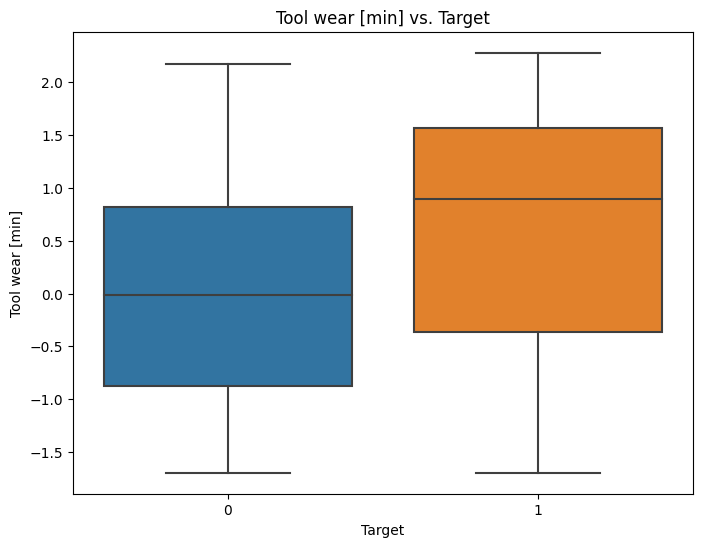

In [31]:
# Plot distribution of numerical features grouped by Target
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=y, y=X[col])
    plt.title(f'{col} vs. Target')
    plt.show()

**Step 6: Check for Outliers**

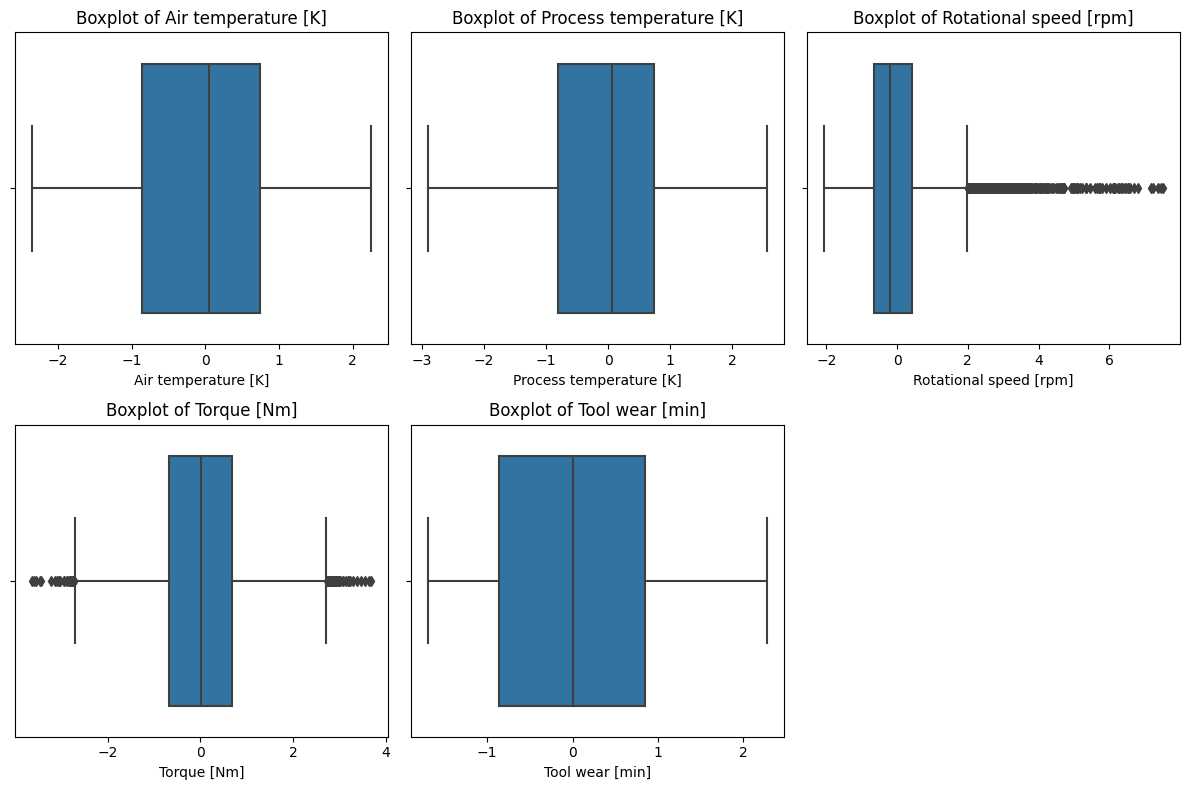

In [33]:
# Boxplot for detecting outliers in numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

**Step 7: Visualize Feature Importance (Optional)**

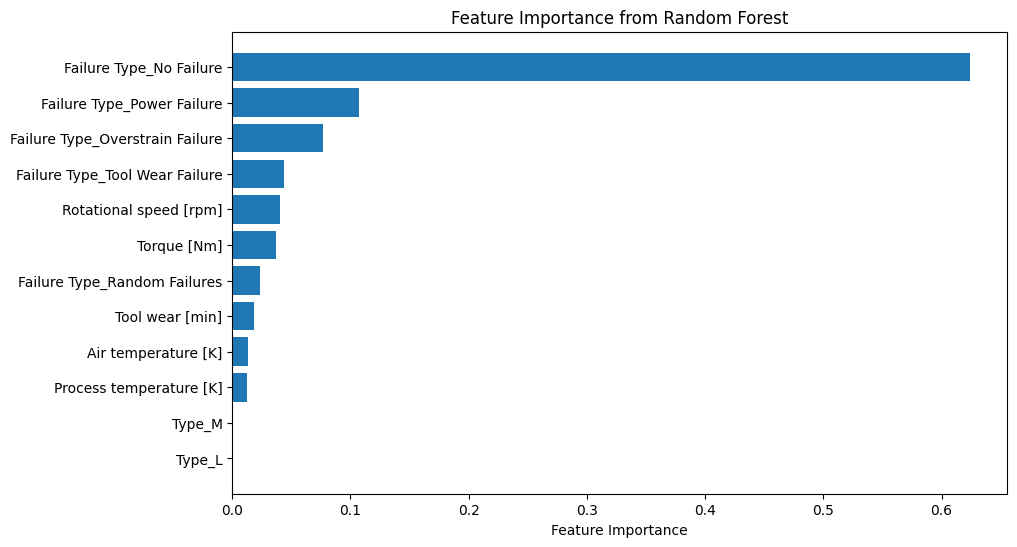

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# **Question 3**

**Step 1: Check Class Distribution**

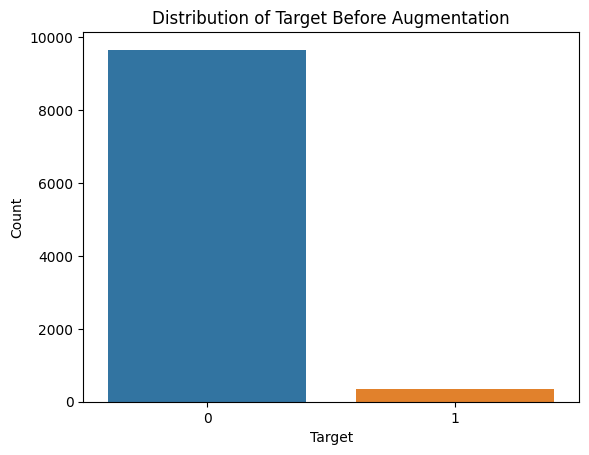

Target
0    9661
1     339
Name: count, dtype: int64


In [35]:
# Check the distribution of the target variable
sns.countplot(x=y)
plt.title('Distribution of Target Before Augmentation')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Count the number of samples in each class
print(y.value_counts())

**Step 2: Apply Oversampling Using SMOTE**

In [36]:
!pip install imbalanced-learn

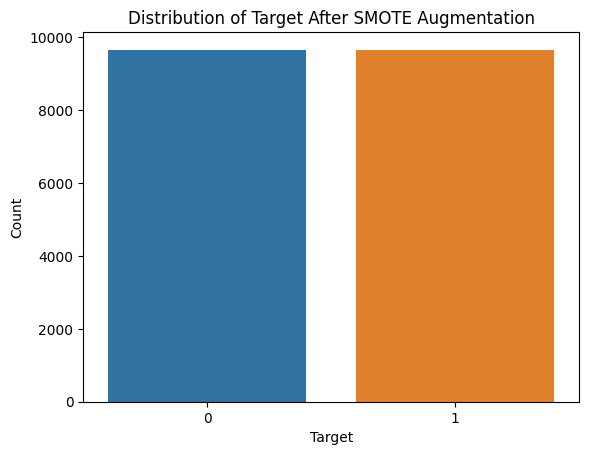

Target
0    9661
1    9661
Name: count, dtype: int64


In [37]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution of the target variable
sns.countplot(x=y_resampled)
plt.title('Distribution of Target After SMOTE Augmentation')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Count the number of samples in each class after SMOTE
print(y_resampled.value_counts())

**Step 3: Apply Random Oversampling (Alternative to SMOTE)**

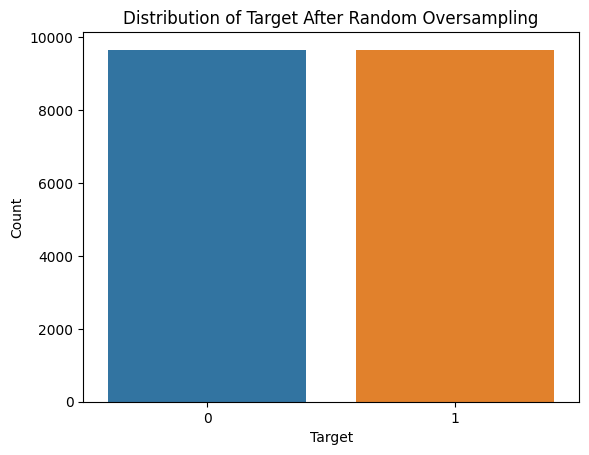

Target
0    9661
1    9661
Name: count, dtype: int64


In [38]:
from sklearn.utils import resample

# Concatenate the original dataset with the target variable
data_with_target = X.copy()
data_with_target['Target'] = y

# Separate the minority and majority classes
minority_class = data_with_target[data_with_target['Target'] == 1]
majority_class = data_with_target[data_with_target['Target'] == 0]

# Upsample the minority class
minority_upsampled = resample(minority_class, 
                               replace=True,     # Sample with replacement
                               n_samples=majority_class.shape[0],  # Match majority class size
                               random_state=42)

# Combine the upsampled minority class with the majority class
data_balanced = pd.concat([majority_class, minority_upsampled])

# Separate features and target again
X_balanced = data_balanced.drop(columns=['Target'])
y_balanced = data_balanced['Target']

# Check the new distribution of the target variable
sns.countplot(x=y_balanced)
plt.title('Distribution of Target After Random Oversampling')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Count the number of samples in each class after random oversampling
print(y_balanced.value_counts())

**Step 4: (Optional) Apply Undersampling**

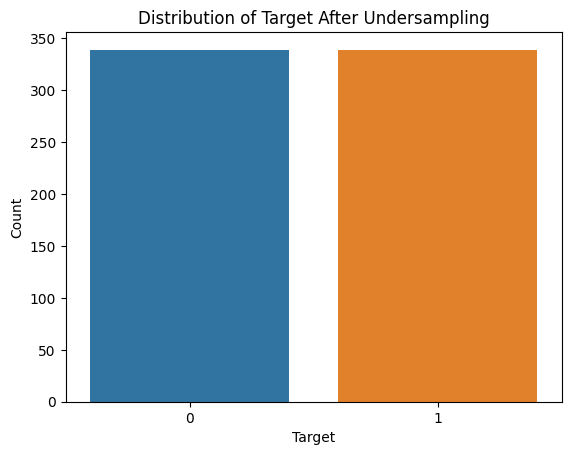

Target
0    339
1    339
Name: count, dtype: int64


In [39]:
# Undersample the majority class
majority_undersampled = resample(majority_class, 
                                 replace=False,     # No replacement, just reducing size
                                 n_samples=minority_class.shape[0],  # Match minority class size
                                 random_state=42)

# Combine the undersampled majority class with the minority class
data_undersampled = pd.concat([majority_undersampled, minority_class])

# Separate features and target again
X_undersampled = data_undersampled.drop(columns=['Target'])
y_undersampled = data_undersampled['Target']

# Check the new distribution of the target variable
sns.countplot(x=y_undersampled)
plt.title('Distribution of Target After Undersampling')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Count the number of samples in each class after undersampling
print(y_undersampled.value_counts())

# **Question 4**

**Step 1: Prepare the Data for PyTorch**

In [41]:
# Check for any non-numeric values or NaN values
print(X_resampled.dtypes)  # Check data types of columns
print(X_resampled.isna().sum())  # Check for any missing values (NaN)

Air temperature [K]                float64
Process temperature [K]            float64
Rotational speed [rpm]             float64
Torque [Nm]                        float64
Tool wear [min]                    float64
Type_L                                bool
Type_M                                bool
Failure Type_No Failure               bool
Failure Type_Overstrain Failure       bool
Failure Type_Power Failure            bool
Failure Type_Random Failures          bool
Failure Type_Tool Wear Failure        bool
dtype: object
Air temperature [K]                0
Process temperature [K]            0
Rotational speed [rpm]             0
Torque [Nm]                        0
Tool wear [min]                    0
Type_L                             0
Type_M                             0
Failure Type_No Failure            0
Failure Type_Overstrain Failure    0
Failure Type_Power Failure         0
Failure Type_Random Failures       0
Failure Type_Tool Wear Failure     0
dtype: int64


In [42]:
# Convert boolean columns to integers
X_resampled_encoded = X_resampled.astype(int)

# Check the data types again to ensure the conversion worked
print(X_resampled_encoded.dtypes)

Air temperature [K]                int64
Process temperature [K]            int64
Rotational speed [rpm]             int64
Torque [Nm]                        int64
Tool wear [min]                    int64
Type_L                             int64
Type_M                             int64
Failure Type_No Failure            int64
Failure Type_Overstrain Failure    int64
Failure Type_Power Failure         int64
Failure Type_Random Failures       int64
Failure Type_Tool Wear Failure     int64
dtype: object


In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_encoded, y_resampled, test_size=0.2, random_state=42)

# Now X_train, X_test, y_train, y_test are defined, and we can continue with the conversion to PyTorch tensors

In [45]:
# Convert cleaned and encoded training data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)  # Numeric data
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Target labels as long for classification

# Create a dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Create a DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Ensure X_test is in the same format (cleaned and encoded)
X_test_encoded = X_test.astype(int)
X_test_tensor = torch.tensor(X_test_encoded.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Check data
print(X_train_tensor.shape, y_train_tensor.shape)
print(X_test_tensor.shape, y_test_tensor.shape)

torch.Size([15457, 12]) torch.Size([15457])
torch.Size([3865, 12]) torch.Size([3865])


**Step 2: Define the Deep Neural Network Model**

In [47]:
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class DNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DNNModel, self).__init__()
        
        # Define layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First hidden layer
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # Second hidden layer
        self.fc3 = nn.Linear(hidden_dim, output_dim)  # Output layer
        
        # Activation function (ReLU for hidden layers)
        self.relu = nn.ReLU()
        
        # Softmax activation for multi-class output
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Apply the first hidden layer and ReLU activation
        x = self.relu(self.fc2(x))  # Apply the second hidden layer and ReLU activation
        x = self.fc3(x)  # Output layer
        return x

# Model instantiation
input_dim = X_train_tensor.shape[1]  # Number of input features
hidden_dim = 128  # Number of neurons in the hidden layers
output_dim = len(y_train_tensor.unique())  # Number of classes (multi-class classification)

model = DNNModel(input_dim, hidden_dim, output_dim)
print(model)

DNNModel(
  (fc1): Linear(in_features=12, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


**Step 3: Set Up Loss Function and Optimizer**

In [49]:
# Loss function (CrossEntropyLoss for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

**Step 4: Training the Model**

In [50]:
# Define the number of epochs
epochs = 10

# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    
    for i, (inputs, labels) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        # Print running loss
        running_loss += loss.item()
    
    # Print average loss after every epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/10, Loss: 0.10532868577625357
Epoch 2/10, Loss: 0.03250381037350436
Epoch 3/10, Loss: 0.029713744881624465
Epoch 4/10, Loss: 0.028416075417579515
Epoch 5/10, Loss: 0.027812466625228124
Epoch 6/10, Loss: 0.027426385061434386
Epoch 7/10, Loss: 0.026735387006024097
Epoch 8/10, Loss: 0.026658591348196817
Epoch 9/10, Loss: 0.026020348543967006
Epoch 10/10, Loss: 0.02671147877189777


**Step 5: Model Evaluation on Test Set**

In [51]:
# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Forward pass on the test set
    outputs = model(X_test_tensor)
    
    # Get predictions by taking the class with the highest probability
    _, predicted = torch.max(outputs, 1)
    
    # Calculate accuracy
    correct = (predicted == y_test_tensor).sum().item()
    accuracy = correct / len(y_test_tensor)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 99.20%


**Step 6: Optionally, Track Metrics (e.g., Loss, Accuracy)**

In [53]:
# Initialize lists to store loss and accuracy
train_losses = []
train_accuracies = []

# Training loop (with metrics tracking)
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Store loss and accuracy
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy*100:.2f}%")

Epoch [1/10], Loss: 0.0265, Accuracy: 99.24%
Epoch [2/10], Loss: 0.0263, Accuracy: 99.28%
Epoch [3/10], Loss: 0.0258, Accuracy: 99.25%
Epoch [4/10], Loss: 0.0259, Accuracy: 99.29%
Epoch [5/10], Loss: 0.0259, Accuracy: 99.26%
Epoch [6/10], Loss: 0.0255, Accuracy: 99.28%
Epoch [7/10], Loss: 0.0255, Accuracy: 99.28%
Epoch [8/10], Loss: 0.0258, Accuracy: 99.25%
Epoch [9/10], Loss: 0.0259, Accuracy: 99.25%
Epoch [10/10], Loss: 0.0258, Accuracy: 99.29%


**Step 7: Plot Training Loss and Accuracy**

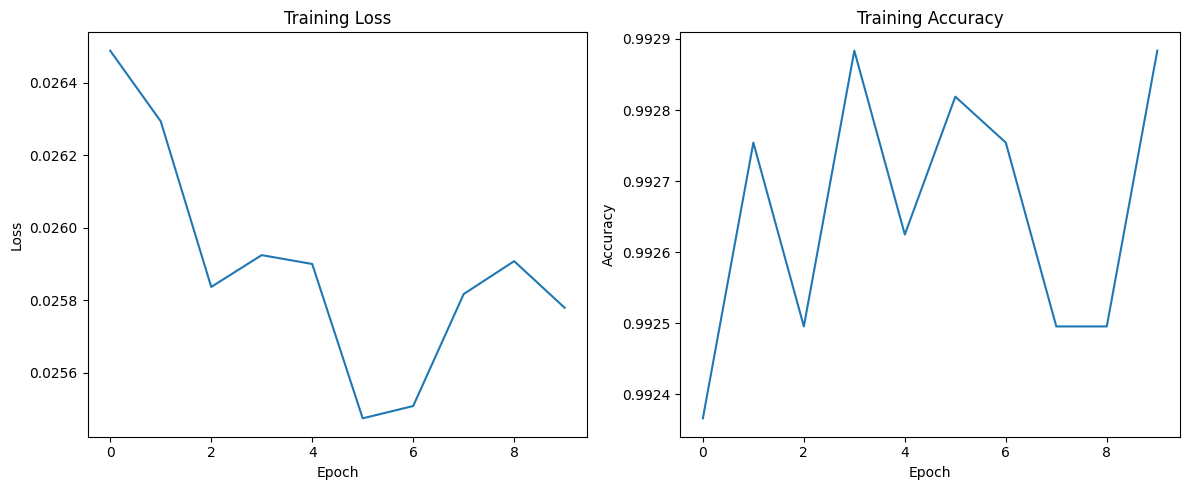

In [55]:
# Plot Training Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# **Question 5**

**Step 1: Wrapping the PyTorch Model into a Scikit-learn Estimator**

In [57]:
from sklearn.base import BaseEstimator, ClassifierMixin
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, hidden_dim=64, output_dim=2, learning_rate=0.001, num_epochs=10, optimizer_type='adam'):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.optimizer_type = optimizer_type

        # Initialize model, criterion and optimizer
        self.model = DNNModel(self.input_dim, self.hidden_dim, self.output_dim)
        self.criterion = nn.CrossEntropyLoss()
        
        if self.optimizer_type == 'adam':
            self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        elif self.optimizer_type == 'sgd':
            self.optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate)
        else:
            raise ValueError("Invalid optimizer type. Choose 'adam' or 'sgd'.")

    def fit(self, X, y):
        self.model.train()
        train_dataset = TensorDataset(torch.tensor(X.values, dtype=torch.float32), torch.tensor(y.values, dtype=torch.long))
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

        for epoch in range(self.num_epochs):
            running_loss = 0.0
            for inputs, labels in train_loader:
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                running_loss += loss.item()

        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(torch.tensor(X.values, dtype=torch.float32))
            _, predicted = torch.max(outputs, 1)
        return predicted.numpy()

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

**Step 2: Define Hyperparameter Grid**

In [61]:
param_grid = {
    'hidden_dim': [64],  # Reduced number of hidden units
    'learning_rate': [0.001],  # Reduced learning rate options
    'num_epochs': [10],  # Reduced number of epochs
    'optimizer_type': ['adam']  # Just one optimizer type
}

In [63]:
grid_search = GridSearchCV(clf, param_grid, cv=2, verbose=1, n_jobs=-1)

In [64]:
X_train_small = X_train.sample(1000)  # Take a smaller random subset
y_train_small = y_train.sample(1000)

grid_search.fit(X_train_small, y_train_small)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/opt/conda/lib/python3.10/site-p

GridSearchCV(cv=2, estimator=PyTorchClassifier(input_dim=12), n_jobs=-1,
             param_grid={'hidden_dim': [64], 'learning_rate': [0.001],
                         'num_epochs': [10], 'optimizer_type': ['adam']},
             verbose=1)

**Step 3: Evaluate and Get Best Hyperparameters**

In [67]:
from sklearn.model_selection import RandomizedSearchCV

# Perform RandomizedSearchCV (faster alternative to GridSearchCV)
random_search = RandomizedSearchCV(clf, param_grid, n_iter=10, cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best hyperparameters found: ", random_search.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best hyperparameters found:  {'optimizer_type': 'adam', 'num_epochs': 10, 'learning_rate': 0.001, 'hidden_dim': 64}


In [68]:
grid_search = GridSearchCV(clf, param_grid, cv=3, verbose=3, n_jobs=-1)

In [69]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
clf.model.to(device)


DNNModel(
  (fc1): Linear(in_features=12, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Perform RandomizedSearchCV (faster alternative to GridSearchCV)
random_search = RandomizedSearchCV(clf, param_grid, n_iter=10, cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best hyperparameters found: ", random_search.best_params_)


In [70]:
# Define a smaller hyperparameter grid
param_grid = {
    'hidden_dim': [64],  # Reduced hidden layers
    'learning_rate': [0.001],  # Simplified learning rate
    'num_epochs': [10],  # Reduced number of epochs
    'optimizer_type': ['adam']  # Single optimizer choice
}

# Initialize the classifier with the number of input features and output classes
clf = PyTorchClassifier(input_dim=input_dim, output_dim=output_dim)

# GridSearchCV with fewer folds and parameters
grid_search = GridSearchCV(clf, param_grid, cv=2, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/opt/conda/lib/python3.10/site-p

Best hyperparameters found:  {'hidden_dim': 64, 'learning_rate': 0.001, 'num_epochs': 10, 'optimizer_type': 'adam'}


In [71]:
# Print the best score and parameters
print("Best accuracy score: ", grid_search.best_score_)
print("Best hyperparameters: ", grid_search.best_params_)

Best accuracy score:  0.9923659350642775
Best hyperparameters:  {'hidden_dim': 64, 'learning_rate': 0.001, 'num_epochs': 10, 'optimizer_type': 'adam'}


# **Question 6**

**Plot the Graphs:**

In [78]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert the datasets to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders with batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Epoch [1/20], Train Loss: 0.3674, Train Accuracy: 97.66%, Test Loss: 0.3249, Test Accuracy: 98.89%
Epoch [2/20], Train Loss: 0.3225, Train Accuracy: 99.11%, Test Loss: 0.3232, Test Accuracy: 99.02%
Epoch [3/20], Train Loss: 0.3220, Train Accuracy: 99.15%, Test Loss: 0.3230, Test Accuracy: 99.02%
Epoch [4/20], Train Loss: 0.3218, Train Accuracy: 99.15%, Test Loss: 0.3228, Test Accuracy: 99.04%
Epoch [5/20], Train Loss: 0.3217, Train Accuracy: 99.16%, Test Loss: 0.3228, Test Accuracy: 99.04%
Epoch [6/20], Train Loss: 0.3217, Train Accuracy: 99.16%, Test Loss: 0.3228, Test Accuracy: 99.04%
Epoch [7/20], Train Loss: 0.3218, Train Accuracy: 99.16%, Test Loss: 0.3227, Test Accuracy: 99.04%
Epoch [8/20], Train Loss: 0.3217, Train Accuracy: 99.16%, Test Loss: 0.3227, Test Accuracy: 99.04%
Epoch [9/20], Train Loss: 0.3218, Train Accuracy: 99.15%, Test Loss: 0.3227, Test Accuracy: 99.04%
Epoch [10/20], Train Loss: 0.3218, Train Accuracy: 99.15%, Test Loss: 0.3227, Test Accuracy: 99.04%
Epoch [11

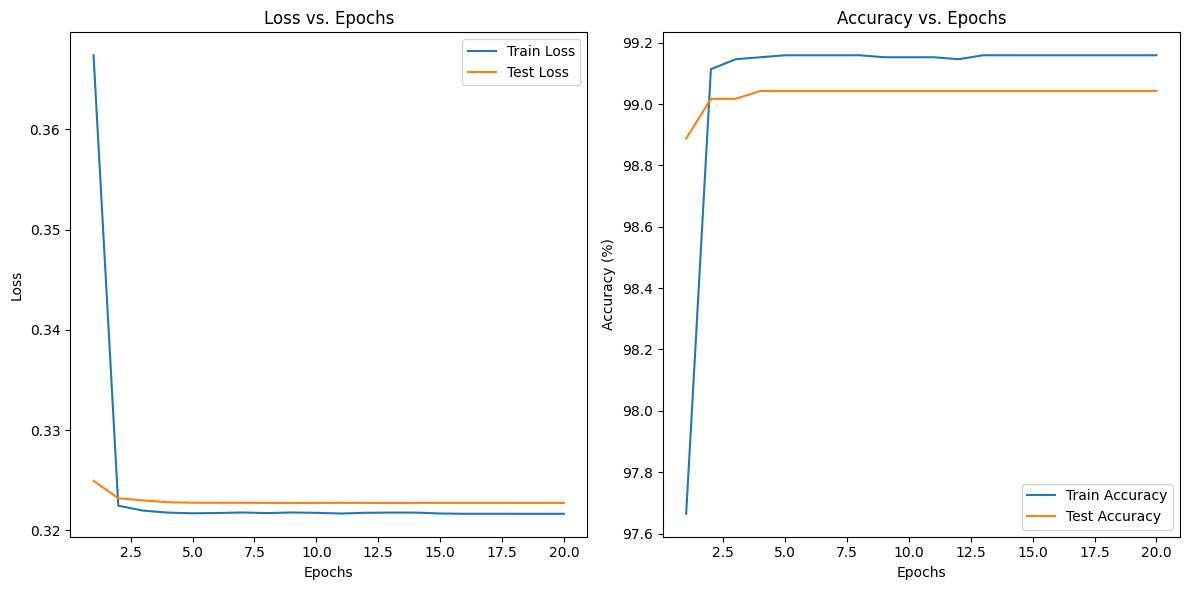

In [79]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train, y_train, X_test, and y_test are already defined
# Convert the datasets to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model Definition (SimpleNN class)
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# Check if a GPU is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
model = SimpleNN(input_dim=X_train_tensor.shape[1], output_dim=len(y_train_tensor.unique())).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

# Lists to store loss and accuracy for each epoch
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    # Train the model
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        # Accumulate loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    # Compute average training loss and accuracy
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    
    # Evaluate the model on the test set
    model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    # Compute average test loss and accuracy
    avg_test_loss = running_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)

    # Print epoch statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Plot the loss graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

# Plot the accuracy graph
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# **Question 7**

**Updated Code with Metric Calculations:**

Epoch [1/20], Train Loss: 0.3217, Train Accuracy: 99.16%, Test Loss: 0.3227, Test Accuracy: 99.04%, Train Sensitivity: 0.99, Test Sensitivity: 0.99, Train F1 Score: 0.99, Test F1 Score: 0.99
Epoch [2/20], Train Loss: 0.3217, Train Accuracy: 99.16%, Test Loss: 0.3227, Test Accuracy: 99.04%, Train Sensitivity: 0.99, Test Sensitivity: 0.99, Train F1 Score: 0.99, Test F1 Score: 0.99
Epoch [3/20], Train Loss: 0.3217, Train Accuracy: 99.16%, Test Loss: 0.3227, Test Accuracy: 99.04%, Train Sensitivity: 0.99, Test Sensitivity: 0.99, Train F1 Score: 0.99, Test F1 Score: 0.99
Epoch [4/20], Train Loss: 0.3217, Train Accuracy: 99.16%, Test Loss: 0.3227, Test Accuracy: 99.04%, Train Sensitivity: 0.99, Test Sensitivity: 0.99, Train F1 Score: 0.99, Test F1 Score: 0.99
Epoch [5/20], Train Loss: 0.3217, Train Accuracy: 99.16%, Test Loss: 0.3227, Test Accuracy: 99.04%, Train Sensitivity: 0.99, Test Sensitivity: 0.99, Train F1 Score: 0.99, Test F1 Score: 0.99
Epoch [6/20], Train Loss: 0.3217, Train Accur

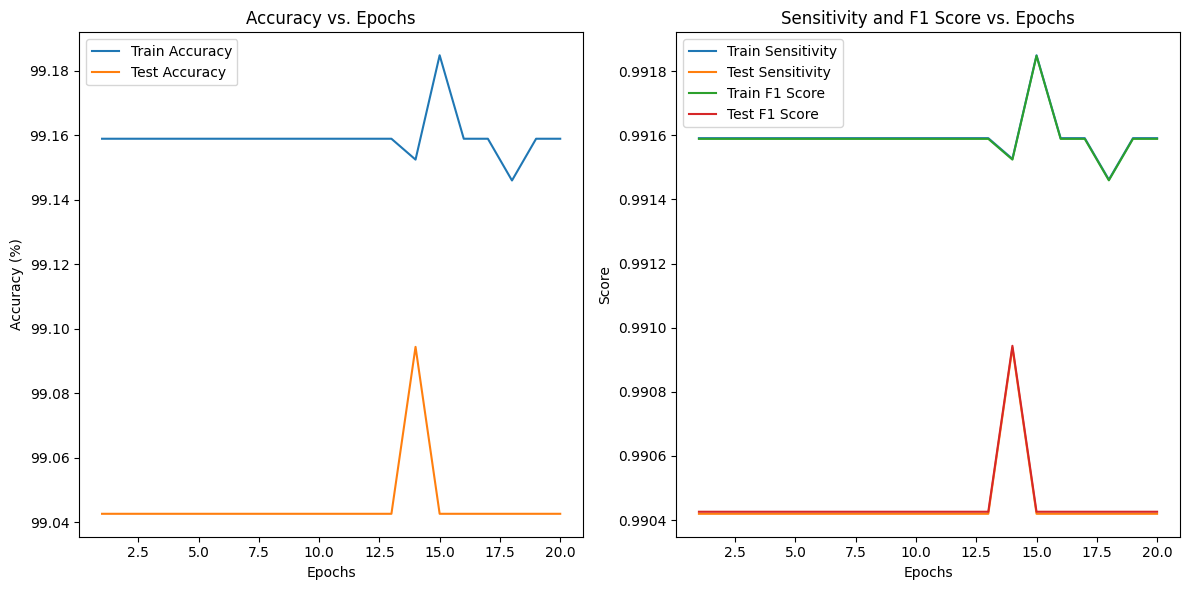

In [80]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Lists to store the metrics for each epoch
train_accuracies = []
test_accuracies = []
train_sensitivities = []
test_sensitivities = []
train_f1_scores = []
test_f1_scores = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    all_train_preds = []
    all_train_labels = []
    
    # Train the model
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        # Accumulate loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        
        # Store all predictions and true labels
        all_train_preds.extend(predicted.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())
    
    # Compute average training loss and accuracy
    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    
    # Calculate sensitivity (recall) and F1 score for training data
    train_sensitivity = recall_score(all_train_labels, all_train_preds, average='macro')  # macro averages for multi-class
    train_f1 = f1_score(all_train_labels, all_train_preds, average='macro')
    train_sensitivities.append(train_sensitivity)
    train_f1_scores.append(train_f1)

    # Evaluate the model on the test set
    model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    all_test_preds = []
    all_test_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            
            # Store all predictions and true labels for test data
            all_test_preds.extend(predicted.cpu().numpy())
            all_test_labels.extend(labels.cpu().numpy())
    
    # Compute average test loss and accuracy
    avg_test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)
    
    # Calculate sensitivity (recall) and F1 score for test data
    test_sensitivity = recall_score(all_test_labels, all_test_preds, average='macro')  # macro averaging for multi-class
    test_f1 = f1_score(all_test_labels, all_test_preds, average='macro')
    test_sensitivities.append(test_sensitivity)
    test_f1_scores.append(test_f1)

    # Print epoch statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%, "
          f"Train Sensitivity: {train_sensitivity:.2f}, Test Sensitivity: {test_sensitivity:.2f}, "
          f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")

# Optionally, you can visualize these metrics over epochs
plt.figure(figsize=(12, 6))

# Plot Accuracy vs Epochs
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Epochs')
plt.legend()

# Plot Sensitivity (Recall) and F1 Score vs Epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_sensitivities, label='Train Sensitivity')
plt.plot(range(1, num_epochs + 1), test_sensitivities, label='Test Sensitivity')
plt.plot(range(1, num_epochs + 1), train_f1_scores, label='Train F1 Score')
plt.plot(range(1, num_epochs + 1), test_f1_scores, label='Test F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Sensitivity and F1 Score vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# **Question 8**

**Regularized Model Implementation:**

Epoch [1/20], Train Loss: 0.1731, Train Accuracy: 94.43%, Test Loss: 0.0518, Test Accuracy: 98.81%, Train Sensitivity: 0.94, Test Sensitivity: 0.99, Train F1 Score: 0.94, Test F1 Score: 0.99
Epoch [2/20], Train Loss: 0.0524, Train Accuracy: 98.80%, Test Loss: 0.0436, Test Accuracy: 98.86%, Train Sensitivity: 0.99, Test Sensitivity: 0.99, Train F1 Score: 0.99, Test F1 Score: 0.99
Epoch [3/20], Train Loss: 0.0444, Train Accuracy: 99.02%, Test Loss: 0.0384, Test Accuracy: 98.86%, Train Sensitivity: 0.99, Test Sensitivity: 0.99, Train F1 Score: 0.99, Test F1 Score: 0.99
Epoch [4/20], Train Loss: 0.0408, Train Accuracy: 99.06%, Test Loss: 0.0386, Test Accuracy: 98.97%, Train Sensitivity: 0.99, Test Sensitivity: 0.99, Train F1 Score: 0.99, Test F1 Score: 0.99
Epoch [5/20], Train Loss: 0.0358, Train Accuracy: 99.15%, Test Loss: 0.0338, Test Accuracy: 98.99%, Train Sensitivity: 0.99, Test Sensitivity: 0.99, Train F1 Score: 0.99, Test F1 Score: 0.99
Epoch [6/20], Train Loss: 0.0349, Train Accur

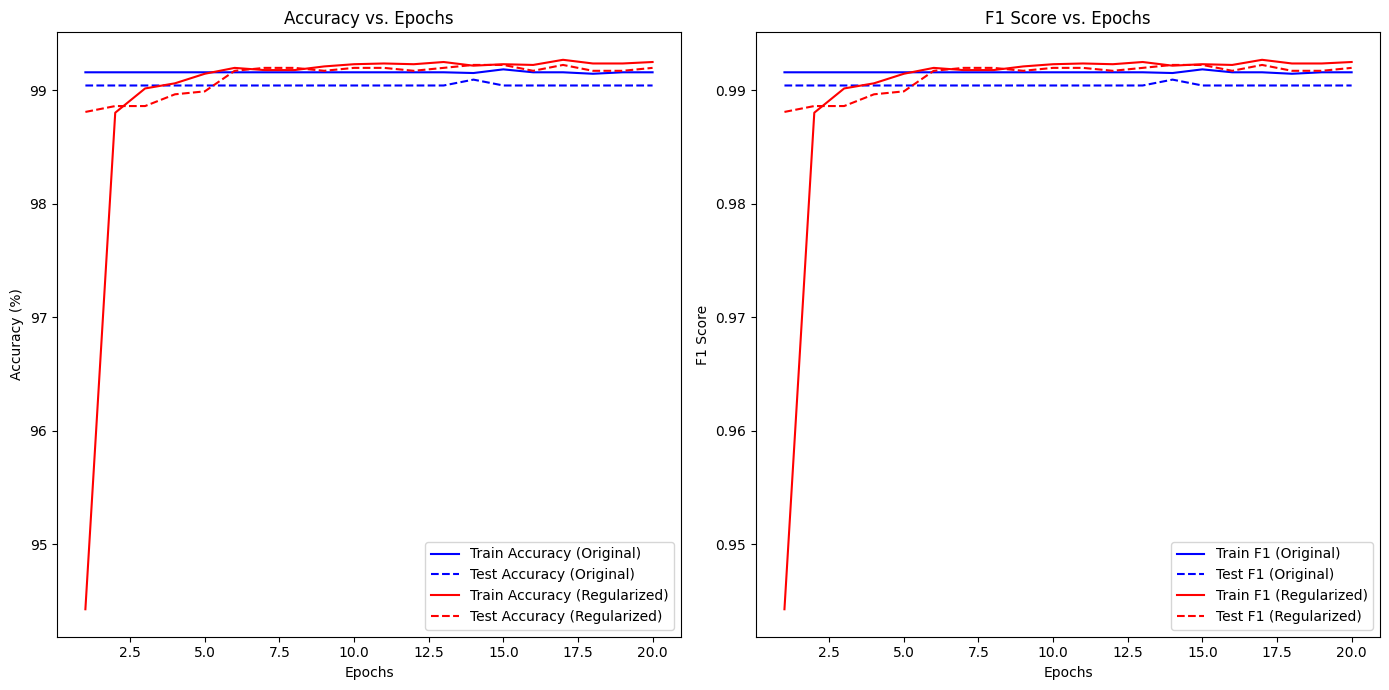

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Define a regularized version of the model with Dropout
class RegularizedNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RegularizedNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        self.dropout = nn.Dropout(0.5)  # 50% dropout
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc3(x)
        return x

# Regularized Model Initialization
model_regularized = RegularizedNN(input_dim=X_train_tensor.shape[1], output_dim=len(y_train_tensor.unique())).to(device)

# Optimizer with L2 Regularization (Weight Decay)
optimizer_regularized = torch.optim.Adam(model_regularized.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization

# Cross-Entropy Loss
criterion = nn.CrossEntropyLoss()

# Lists to store the metrics for regularized model
train_accuracies_reg = []
test_accuracies_reg = []
train_sensitivities_reg = []
test_sensitivities_reg = []
train_f1_scores_reg = []
test_f1_scores_reg = []

# Training loop for the regularized model
num_epochs = 20
for epoch in range(num_epochs):
    model_regularized.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    all_train_preds = []
    all_train_labels = []
    
    # Train the regularized model
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer_regularized.zero_grad()
        outputs = model_regularized(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_regularized.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        all_train_preds.extend(predicted.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_accuracies_reg.append(train_accuracy)
    
    train_sensitivity = recall_score(all_train_labels, all_train_preds, average='macro')
    train_f1 = f1_score(all_train_labels, all_train_preds, average='macro')
    train_sensitivities_reg.append(train_sensitivity)
    train_f1_scores_reg.append(train_f1)

    # Evaluate the regularized model on the test set
    model_regularized.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    all_test_preds = []
    all_test_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_regularized(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

            all_test_preds.extend(predicted.cpu().numpy())
            all_test_labels.extend(labels.cpu().numpy())

    avg_test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test
    test_accuracies_reg.append(test_accuracy)
    
    test_sensitivity = recall_score(all_test_labels, all_test_preds, average='macro')
    test_f1 = f1_score(all_test_labels, all_test_preds, average='macro')
    test_sensitivities_reg.append(test_sensitivity)
    test_f1_scores_reg.append(test_f1)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%, "
          f"Train Sensitivity: {train_sensitivity:.2f}, Test Sensitivity: {test_sensitivity:.2f}, "
          f"Train F1 Score: {train_f1:.2f}, Test F1 Score: {test_f1:.2f}")

# Plot Accuracy and F1 Score comparison between original and regularized model
plt.figure(figsize=(14, 7))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy (Original)', linestyle='-', color='blue')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy (Original)', linestyle='--', color='blue')
plt.plot(range(1, num_epochs + 1), train_accuracies_reg, label='Train Accuracy (Regularized)', linestyle='-', color='red')
plt.plot(range(1, num_epochs + 1), test_accuracies_reg, label='Test Accuracy (Regularized)', linestyle='--', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Epochs')
plt.legend()

# F1 Score comparison
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_f1_scores, label='Train F1 (Original)', linestyle='-', color='blue')
plt.plot(range(1, num_epochs + 1), test_f1_scores, label='Test F1 (Original)', linestyle='--', color='blue')
plt.plot(range(1, num_epochs + 1), train_f1_scores_reg, label='Train F1 (Regularized)', linestyle='-', color='red')
plt.plot(range(1, num_epochs + 1), test_f1_scores_reg, label='Test F1 (Regularized)', linestyle='--', color='red')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()